In [1]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Oct 26 14:55:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [4]:
%cd '/content/gdrive/My Drive/LDS8_K279_ONLINE_VienTriThienAnh/LDS8_K279_VienTriThienAnh_Cuoi_ky/'

/content/gdrive/My Drive/LDS8_K279_ONLINE_VienTriThienAnh/LDS8_K279_VienTriThienAnh_Cuoi_ky


In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

## Overview of the dataset

In [6]:
data = pd.read_csv('Dataset/kddcup.data.gz',  compression='gzip', header=None)

In [7]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [8]:
# dataset has no column names so add them based on these links http://kdd.ics.uci.edu/databases/kddcup99/task.html, http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names.
data.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',   
    'num_failed_logins',
    'logged_in',   
    'num_compromised',
    'root_shell',   
    'su_attempted',
    'num_root',   
    'num_file_creations',
    'num_shells',   
    'num_access_files',
    'num_outbound_cmds',   
    'is_hot_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',   
    'srv_diff_host_rate',
    'dst_host_count',   
    'dst_host_srv_count',
    'dst_host_same_srv_rate',   
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',   
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',   
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',   
    'dst_host_srv_rerror_rate',
    'outcome'
]

In [9]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898431 entries, 0 to 4898430
Data columns (total 42 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   duration                     int64  
 1   protocol_type                object 
 2   service                      object 
 3   flag                         object 
 4   src_bytes                    int64  
 5   dst_bytes                    int64  
 6   land                         int64  
 7   wrong_fragment               int64  
 8   urgent                       int64  
 9   hot                          int64  
 10  num_failed_logins            int64  
 11  logged_in                    int64  
 12  num_compromised              int64  
 13  root_shell                   int64  
 14  su_attempted                 int64  
 15  num_root                     int64  
 16  num_file_creations           int64  
 17  num_shells                   int64  
 18  num_access_files             int64  
 19  

In [11]:
#Change to the correct dtypes
data[['land', 'logged_in', 'is_hot_login','is_guest_login']] = data[['land', 'logged_in','is_hot_login','is_guest_login']].apply(lambda x: x.astype(str))

In [12]:
data['outcome_class'] = data['outcome'].apply(lambda x: 'normal' if x == 'normal.' else 'bad')

In [13]:
outcome_class = {'normal': 0, 'bad': 1}
data['outcome_num'] = [outcome_class[i] for i in data.outcome_class]
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,outcome_class,outcome_num
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.,normal,0
1,0,tcp,http,SF,162,4528,0,0,0,0,...,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.,normal,0
2,0,tcp,http,SF,236,1228,0,0,0,0,...,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.,normal,0
3,0,tcp,http,SF,233,2032,0,0,0,0,...,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.,normal,0
4,0,tcp,http,SF,239,486,0,0,0,0,...,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.,normal,0


In [14]:
X = data.drop(['outcome','outcome_class','outcome_num'], axis=1)
y = data[['outcome_num']].values

### Encoding Categorical variables

In [15]:
def encode_categorical(df,name):
    dummies = pd.get_dummies(df[name], drop_first=True)
    for c in dummies.columns:
        dum_name = f'{name} - {c}'
        df[dum_name] = dummies[c]
    df.drop(name,axis=1, inplace=True)

In [16]:
for c in X.columns:
    if X[c].dtype == 'object':
        encode_categorical(X, c)

### Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

### Splitting the dataset into training and testing set

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Building ANN

In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [20]:
callbacks = [EarlyStopping(monitor='val_loss', patience=5),
             ModelCheckpoint('model_checkpoint_25102022.h5',
                             save_best_only=True)]

In [21]:
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_dim= X_train.shape[1], kernel_initializer='normal'),
    layers.Dense(y_train.shape[1], activation='sigmoid')
])

In [22]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
import os

In [24]:
import datetime

In [25]:
t0 = datetime.datetime.now()
print(t0)

2022-10-26 14:56:46.392643


In [26]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size= 32,
    epochs= 20,
    callbacks=callbacks,
    use_multiprocessing = True,
    workers = os.cpu_count()
)

Epoch 1/20
122461/122461 [==============================] - 344s 3ms/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0017 - val_accuracy: 0.9997
Epoch 2/20
122461/122461 [==============================] - 338s 3ms/step - loss: 0.0020 - accuracy: 0.9997 - val_loss: 0.0017 - val_accuracy: 0.9998
Epoch 3/20
122461/122461 [==============================] - 337s 3ms/step - loss: 0.0020 - accuracy: 0.9997 - val_loss: 0.0018 - val_accuracy: 0.9997
Epoch 4/20
122461/122461 [==============================] - 335s 3ms/step - loss: 0.0021 - accuracy: 0.9997 - val_loss: 0.0018 - val_accuracy: 0.9998
Epoch 5/20
122461/122461 [==============================] - 335s 3ms/step - loss: 0.0019 - accuracy: 0.9998 - val_loss: 0.0015 - val_accuracy: 0.9998
Epoch 6/20
122461/122461 [==============================] - 335s 3ms/step - loss: 0.0019 - accuracy: 0.9998 - val_loss: 0.0018 - val_accuracy: 0.9998
Epoch 7/20
122461/122461 [==============================] - 371s 3ms/step - loss: 0.0022 - accuracy:

In [27]:
t1 = datetime.datetime.now()
print(t1-t0)

1:18:50.960132


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                1920      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,937
Trainable params: 1,937
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.evaluate(X_test, y_test)

30616/30616 [==============================] - 59s 2ms/step - loss: 0.0017 - accuracy: 0.9998


[0.0016700117848813534, 0.9997693300247192]

##### Comment:
- The model reached 99% accuracy

In [30]:
y_pred = model.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

30616/30616 [==============================] - 36s 1ms/step
[[1. 1.]
 [1. 1.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]


Minimum validation loss 0.0012144389329478145


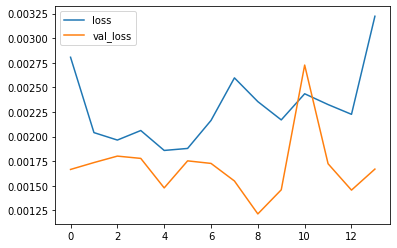

In [31]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print('Minimum validation loss {}'.format(history_df['val_loss'].min()))